# Video Games Sales - Exploratory Data Analysis

## Analyse the Dataset

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Graphics in SVG format are more sharp and legible

In [2]:
%config InlineBackend.figure_format = 'svg'

Let us increase the default plot size and the set the color scheme

In [3]:
plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'

In [4]:
df = pd.read_csv(r'C:\Users\Guestuser\Downloads\Video_Games_Sales_as_at_22_Dec_2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


From the info, we can notice that, some features have the null valus.
In this study we will filer for features that have all of their values present.

In [5]:
df = df.dropna()
print(df.shape)

(6825, 16)


Let's see the info again dataframe ( offcourse no need to do this )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


From the above info, "Year_of_Release", "User_Count" and "Critic_Count" are showing as "float", let us convert into int.
Similarly 'User_Score' is showing as an object, et us convert into float.

In [7]:
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

Let us print the datframe's first few rows to understand about the features

In [8]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii             2006    Sports  Nintendo   
2         Mario Kart Wii      Wii             2008    Racing  Nintendo   
3      Wii Sports Resort      Wii             2009    Sports  Nintendo   
6  New Super Mario Bros.       DS             2006  Platform  Nintendo   
7               Wii Play      Wii             2006      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer Rating  
0            51         8.0         322  Nintendo      E  
2            73         8.3         709  Nintendo      E  
3            73         8.0         192  Nintendo      E  
6            65         8.5         431  Nintendo      E  
7            41         6.6         129  Nintendo      E

The dataframe had 6825 examples and 16 columns.
In this study, we will make list of useful features

In [9]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales',
              'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

## Plotting using the Panda's plot()

DataFrame has plot() method, using this method we can visualize the data also.
We will create a plot of video game sales by country and year.
First, let's keep only the columns we need. Then, we will calulate the total sales by year and call the plot() method on the resulting DataFrame.

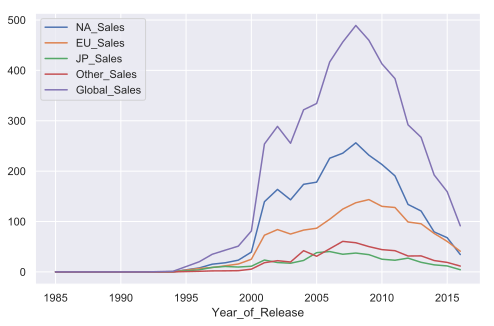

In [10]:
df[[x for x in df.columns if 'Sales' in x] +
  ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

The implementation of plot() method in pandas is based on matplotlib.

Using the kind parameter, we can change the type of the plot to, for example, bar chart. 
'rot parameter is responsible for the rotation angle of the ticks on the x-axis ( for vertical plots):

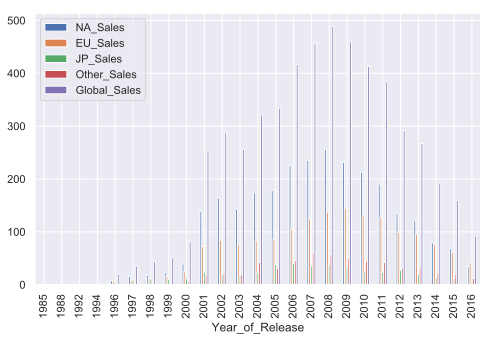

In [11]:
df[[x for x in df.columns if 'Sales' in x] + 
  ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=90);

## Using the Seaborn

Seaborn is a higher level API based on the matplotlib library.  Among other things, it differs from the latter in that it contains more adequate default settings for plotting.

### pairplot()

Let us see the pairwise relationships plot. This creates a matrix of scatter plots by default. This kid of plot helps us visualize the relationship between different variables in a single output.

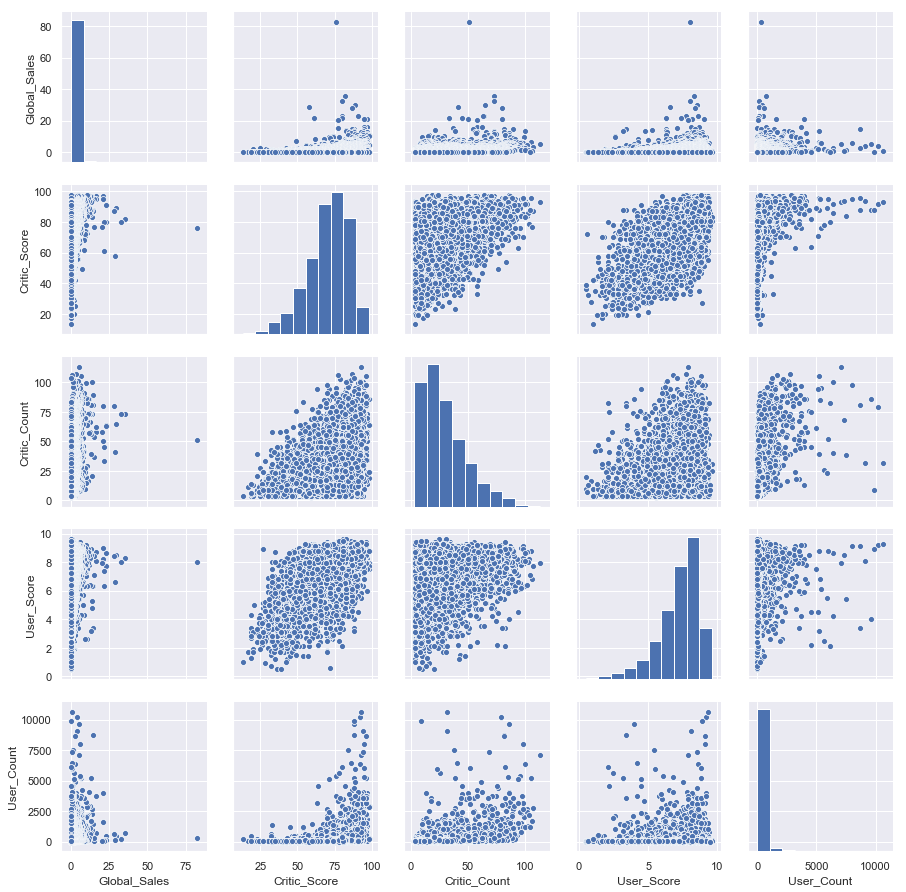

In [12]:
# pairplot() may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

As we can see, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

### distplot()

It is also plossible to plot a distribution of observations with seaborn's displot(). Let us look at the distribution of Critic_Score. By default, the plot displays a histogram and the kernel density estimate.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


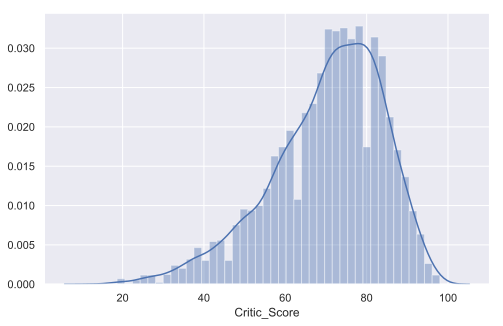

In [13]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score']);

### jointplot()

To look more closely at the relationship between two numerical variables, we can use joint plot, which is a cross between a scatter plot and histogram.
Let's see how the Critic_score and User_Score features are related.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


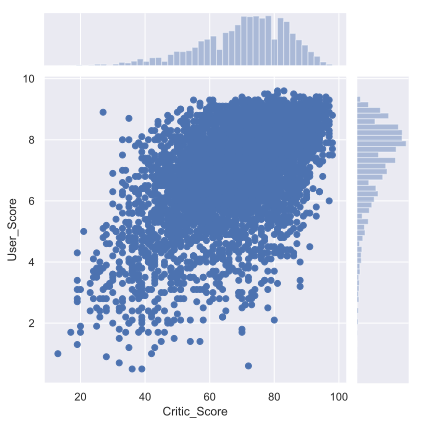

In [14]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter');

### boxplot()

We will compare critics ratings for the top 5 biggest gaming platforms.

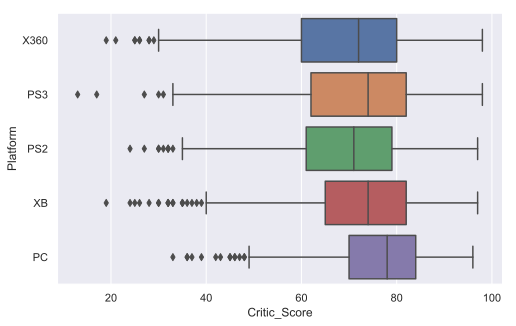

In [15]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y='Platform', x = 'Critic_Score', 
           data = df[df['Platform'].isin(top_platforms)], orient = 'h' );

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; it's length determined by the 25%(Q1) and 75%(Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually.

### heatmap() 

The last type of plot that we will cover here is a heat map. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

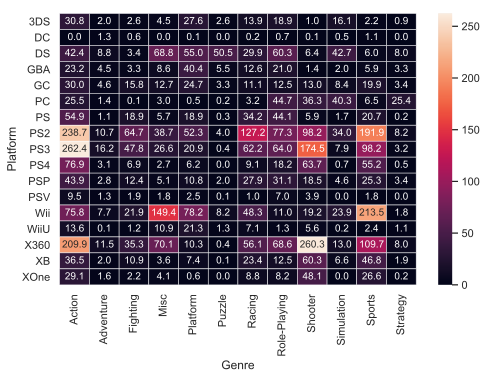

In [16]:
platform_genre_sales = df.pivot_table(
                        index = 'Platform',
                        columns = 'Genre',
                        values = 'Global_Sales',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

# Plotly

We have examined some visualization tools based on the matplotlib library. However, this is not the only option for plotting in Python. Let’s take a look at the plotly library. Plotly is an open-source library that allows creation of interactive plots within a Jupyter notebook without having to use Javascript.

The real beauty of interactive plots is that they provide a user interface for detailed data exploration. For example, you can see exact numerical values by mousing over points, hide uninteresting series from the visualization, zoom in onto a specific part of the plot, etc.

Before we start, let’s import all the necessary modules and initialize plotly by calling the init_notebook_mode() function.

In [20]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly
#import plotly.graph_objs as go

#init_notebook_mode(connected=True)